# Classification trees
This lab is a level up from previous sessions ! There is no code snippet for demonstration, as you should now be able to answer the different questions by reading the documentation.

## Classification trees

In [5]:
!pip install pandas
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv(r"C:\Users\louka\OneDrive\Bureau\math comp 2\projet\ApprentissageSupervise\projetStatsChampsLol.csv")



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: C:\Users\louka\OneDrive\Bureau\math comp 2\Githup du cours\venv\Scripts\python.exe -m pip install --upgrade pip


In [7]:
from sklearn.preprocessing import MinMaxScaler
qualitative_vars = ["Ranged","Class"]
target_vars = ["isTop","isJgl","isMid","isBot","isSup"]
quantitative_vars = [col for col in df.columns if col not in qualitative_vars + target_vars + ["Name"]]
print(qualitative_vars)
print(quantitative_vars)
print(target_vars)

X_categorical_encoded = pd.get_dummies(df["Class"],dtype=int)


min_max_scaler = MinMaxScaler((0,1))
min_max_scaler.fit(df[quantitative_vars])
scaled_quantitative = min_max_scaler.transform(df[quantitative_vars])

X = pd.concat([pd.DataFrame(scaled_quantitative, columns=quantitative_vars), X_categorical_encoded], axis=1)
print(X)





['Ranged', 'Class']
['HP', 'HP+', 'HP5', 'HP5+', 'MP', 'MP+', 'MP5', 'MP5+', 'AD', 'AD+', 'AS', 'AS+', 'AR', 'AR+', 'MR', 'MR+', 'MS', 'Range']
['isTop', 'isJgl', 'isMid', 'isBot', 'isSup']
         HP       HP+    HP5  HP5+        MP       MP+    MP5  MP5+        AD  \
0    0.6000  0.544484  0.300  0.80  0.000000  0.000000  0.000  0.00  0.689655   
1    0.4500  0.423488  0.250  0.48  0.788679  0.287356  0.160  0.80  0.448276   
2    0.4000  0.604982  0.900  0.72  0.377358  0.000000  1.000  0.00  0.758621   
3    0.5500  0.459786  0.375  0.52  0.660377  0.459770  0.164  0.70  0.413793   
4    0.6875  0.617082  0.850  0.68  0.660377  0.459770  0.170  0.80  0.758621   
..      ...       ...    ...   ...       ...       ...    ...   ...       ...   
166  0.5500  0.496085  0.325  0.56  0.471698  0.517241  0.120  0.80  0.551724   
167  0.4900  0.447687  0.650  0.48  0.905660  0.270115  0.160  0.80  0.517241   
168  0.4100  0.326690  0.550  0.40  0.852830  0.574713  0.227  0.80  0.413793   


In [9]:
y=df[target_vars]

### Building a tree

**Questions**:
1. Build a decision tree on your previously processed dataset, using `DecisionTreeClassifier` (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier).
2. What are the different available hyperparameters in sklearn for decision trees ?
3. Select optimum hyperparameters using a cross validation setting.
4. Return optimum parameters combination using cross validation and final accuracy (or recall or precision depending on your wanted target)
5. Explain how the attribute `feature_importances_` is computed.
6. Plot an elbow plot the most important features in your dataset and select the subset of most important features.
7. Run classification experiment and see if results are impacted.
8. **Bonus**: Use the features selected by the trees and test the two other classification method we tested: KNN and Naive Bayes.

In [10]:
#1.Build a decision tree on your previously processed dataset, using DecisionTreeClassifier 
from sklearn import tree
from sklearn.metrics import classification_report

In [11]:
for targ in y:

    treee= tree.DecisionTreeClassifier()
    print("======= Training")
    treee.fit(X, y[targ])

    print("======= Prediction")
    predictions = treee.predict(X)

    print("======= Results")
    print(classification_report(y[targ], predictions))

======= Training
======= Prediction
======= Results
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       113
           1       1.00      1.00      1.00        58

    accuracy                           1.00       171
   macro avg       1.00      1.00      1.00       171
weighted avg       1.00      1.00      1.00       171

======= Training
======= Prediction
======= Results
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       121
           1       1.00      1.00      1.00        50

    accuracy                           1.00       171
   macro avg       1.00      1.00      1.00       171
weighted avg       1.00      1.00      1.00       171

======= Training
======= Prediction
======= Results
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       115
           1       1.00      1.00      1.00        56

    accuracy              

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
#from sklearn.metrics import precision_score


# Initialiser le classificateur tree avec les paramètres par défaut
treee = tree.DecisionTreeClassifier()

accuracies = np.zeros((len(y.columns), 4, 8))
recalls = np.zeros((len(y.columns),4,8))
#precisions = np.zeros((len(y.columns),4,8))

for i, targ in enumerate(y.columns):
    X_train, X_test, y_train, y_test = train_test_split(X, y[targ], test_size=0.2, stratify=y[targ])

    for il, l in enumerate(range(1, 5)):
        for id, d in enumerate(range(7, 15)):
            #pour eviter l'alea, on fait la moyenne sur cing aprentissages
            for z in range(0,30):
                tree_clasifier = tree.DecisionTreeClassifier(max_depth=d, min_samples_leaf=l, random_state=z)
                tree_clasifier.fit(X_train, y_train)
                prediction = tree_clasifier.predict(X_test)
                accuracy = accuracy_score(y_test, prediction)
                recall = recall_score(y_test, prediction)
                #precision = precision_score(y_test, prediction)
                accuracies[i, il, id] += accuracy/30  # Stocker l'accuracy dans le tableau accuracies
                recalls[i, il, id] += recall/30
                #precisions[i,il,id] += precision/30
            
mean_accuracies = np.zeros((4, 8))
mean_recalls = np.zeros((4,8))
for il, l in enumerate(range(1, 5)):
    for id, d in enumerate(range(1, 9)):
        mean_accuracy = 0
        mean_recall = 0
        #mean_precision=0
        for i, targ in enumerate(y.columns):
            mean_accuracy+=accuracies[i, il, id]
            mean_recall+=recalls[i,il,id]
            #mean_precision+=recalls[i,il,id]
        mean_accuracy/=len(y.columns)
        mean_recall/=len(y.columns)
        #mean_precision/=len(y.columns)
        mean_accuracies[il, id] = mean_accuracy
        mean_recalls[il,id]= mean_recall
        #mean_precision[il,id] = mean_accuracy
        
mean_accuracies = pd.DataFrame(mean_accuracies)
mean_accuracies.columns = ["max_depth =1","2","3","4", "5", "6","7","8"]
mean_accuracies = mean_accuracies.transpose()
mean_accuracies.columns = ["min_leaf_sample=1", "2", "3","4"]
print(mean_accuracies)
mean_recalls = pd.DataFrame(mean_recalls)
mean_recalls.columns = ["max_depth =1","2","3","4", "5", "6","7","8"]
mean_recalls = mean_recalls.transpose()
mean_recalls.columns = ["min_leaf_sample=1", "2", "3","4"]
print(mean_recalls)
#mean_precision = pd.DataFrame(mean_precision)
#mean_precision.columns = ["max_depth =1","2","3","4", "5", "6","7","8"]
#mean_precision = mean_precision.transpose()
#mean_precision.columns = ["min_leaf_sample=1", "2", "3","4"]
#print(mean_precision)

              min_leaf_sample=1         2         3         4
max_depth =1           0.805333  0.791238  0.789143  0.778286
2                      0.786095  0.777714  0.772000  0.762286
3                      0.781714  0.772000  0.772000  0.763619
4                      0.774286  0.768000  0.775619  0.763619
5                      0.773714  0.767048  0.775619  0.763619
6                      0.773714  0.759619  0.775619  0.763619
7                      0.771429  0.759619  0.775619  0.763619
8                      0.771429  0.759619  0.775619  0.763619
              min_leaf_sample=1         2         3         4
max_depth =1           0.681051  0.631010  0.571768  0.531465
2                      0.682828  0.630556  0.571768  0.531465
3                      0.678465  0.631838  0.571768  0.531465
4                      0.683697  0.645354  0.584434  0.531465
5                      0.681697  0.640687  0.584434  0.531465
6                      0.682364  0.641354  0.584434  0.531465
7       

criterion: It specifies the function to measure the quality of a split. Supported criteria are "gini" for the Gini impurity and "entropy" for the information gain.

max_depth: The maximum depth of the tree. If None, nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

min_samples_split: The minimum number of samples required to split an internal node.

min_samples_leaf: The minimum number of samples required to be at a leaf node.

max_features: The number of features to consider when looking for the best split.

max_leaf_nodes: Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity.

min_impurity_decrease: A node will be split if this split induces a decrease of the impurity greater than or equal to this value.

min_impurity_split: Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.

splitter: The strategy used to choose the split at each node. Supported strategies are "best" to choose the best split and "random" to choose the best random split.

In [8]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'criterion': ['entropy','gini'], 
    'max_depth': [1,2,3,4,5,6,7,8,9,10],
    'min_samples_leaf': [1,2,3,4,5,6,7]
}


# Recherche des meilleurs hyperparamètres avec validation croisée
grid_search = GridSearchCV(estimator=treee, param_grid=param_grid, cv=5)
for targ in y:
    print("==================",targ,"===================")
    for atempt in range(0,5):
        grid_search.fit(X, y[targ])
        print("Meilleurs hyperparamètres :",grid_search.best_params_, " Meilleur score :", grid_search.best_score_)


# Affichage des meilleurs hyperparamètres et du meilleur score
#gini, 7, 1,2, 0.7890
#entropy , 7, 4, 3, 0.7773
#entropy, 2, 1,2, 0.7717
#gini, 8, 1, 3, 0.7831
#entropy, 2, 1, 2, 0.7717
# gini, 7, 1, 7, 0.
# entropy, 7, 3, 6, 0.7774

================== isTop ===================
Meilleurs hyperparamètres : {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 1}  Meilleur score : 0.7717647058823529
Meilleurs hyperparamètres : {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 1}  Meilleur score : 0.7717647058823529
Meilleurs hyperparamètres : {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 1}  Meilleur score : 0.7717647058823529
Meilleurs hyperparamètres : {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 1}  Meilleur score : 0.7717647058823529
Meilleurs hyperparamètres : {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 1}  Meilleur score : 0.7717647058823529
================== isJgl ===================
Meilleurs hyperparamètres : {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 4}  Meilleur score : 0.7663865546218488
Meilleurs hyperparamètres : {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 4}  Meilleur score : 0.7667226890756302
Meilleurs hyp

In [14]:
leaf=[1, 4, 3,1,1]
criterion=['entropy' ,'gini','gini','entropy','entropy']
depth=[2,8,4,2,8]

Explain how the attribute feature_importances_ is computed.
- Gini impurity or Entropy decrease
- Weighted impurity decrease
- Normalization
Plot an elbow plot the most important features in your dataset and select the subset of most important features.
Run classification experiment and see if results are impacted.
Bonus: Use the features selected by the trees and test the two other classification method we tested: KNN and Naive Bayes.

In [15]:
from sklearn.model_selection import cross_val_score

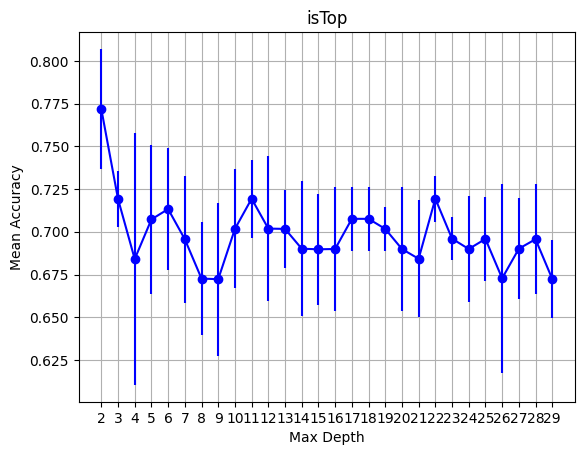

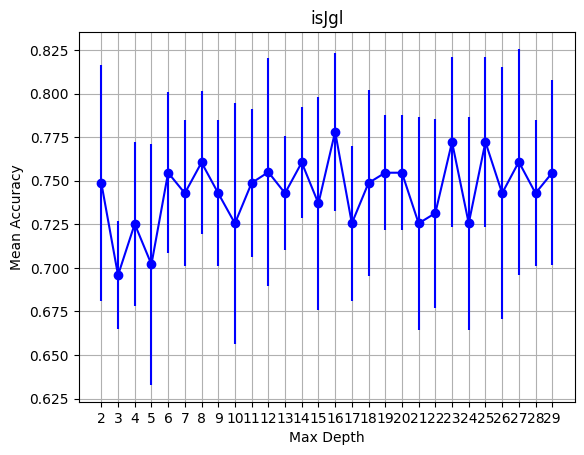

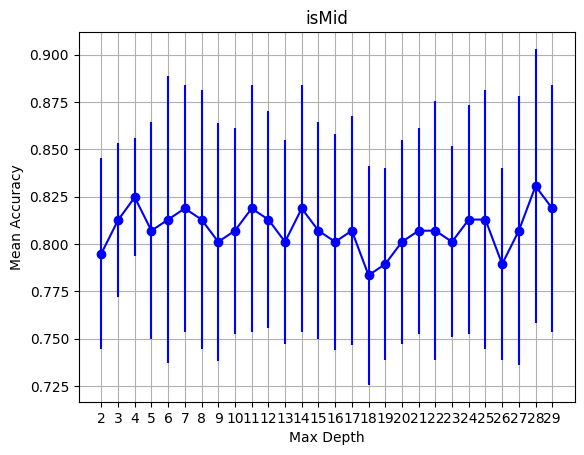

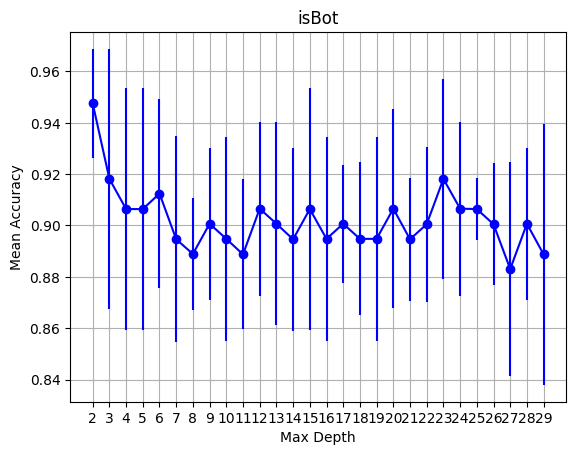

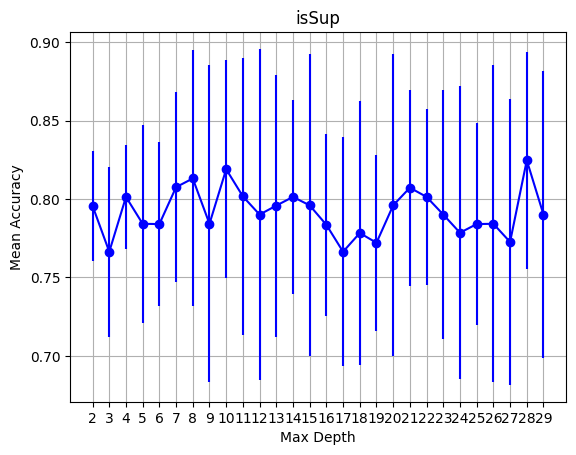

In [11]:
max_depth_values = np.arange(2, 30)

# Initialize lists to store mean accuracy scores and standard deviations

# Evaluate the model for each max_depth value using 5-fold cross-validation
z=0
for targ in y:
    mean_scores = []
    std_scores = []

    for max_depth in max_depth_values:
        model = tree.DecisionTreeClassifier(max_depth=max_depth, criterion=criterion[z], min_samples_leaf=leaf[z])
        scores = cross_val_score(model, X, y[targ], cv=5, scoring='accuracy')
        mean_scores.append(scores.mean())
        std_scores.append(scores.std())
    z+=1

# Plot the elbow plot
    plt.errorbar(max_depth_values, mean_scores, yerr=std_scores, fmt='-o', color='b')
    plt.title(targ)
    plt.xlabel('Max Depth')
    plt.ylabel('Mean Accuracy')
    plt.xticks(max_depth_values)
    plt.grid(True)
    plt.show()

### Representation

Trees can be represented using the `tree.plot_tree` function.

**Questions**:
1. Plot the previous tree.
2. Explain every single information provided by the tree.

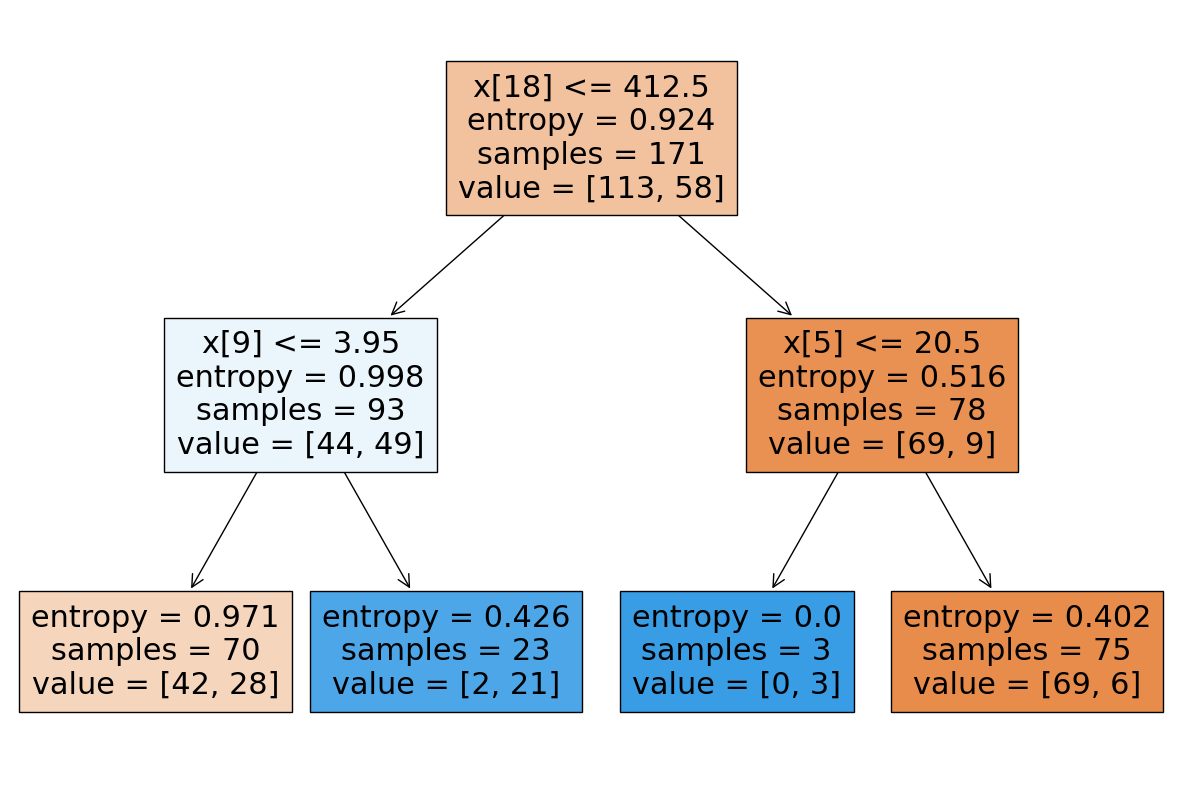

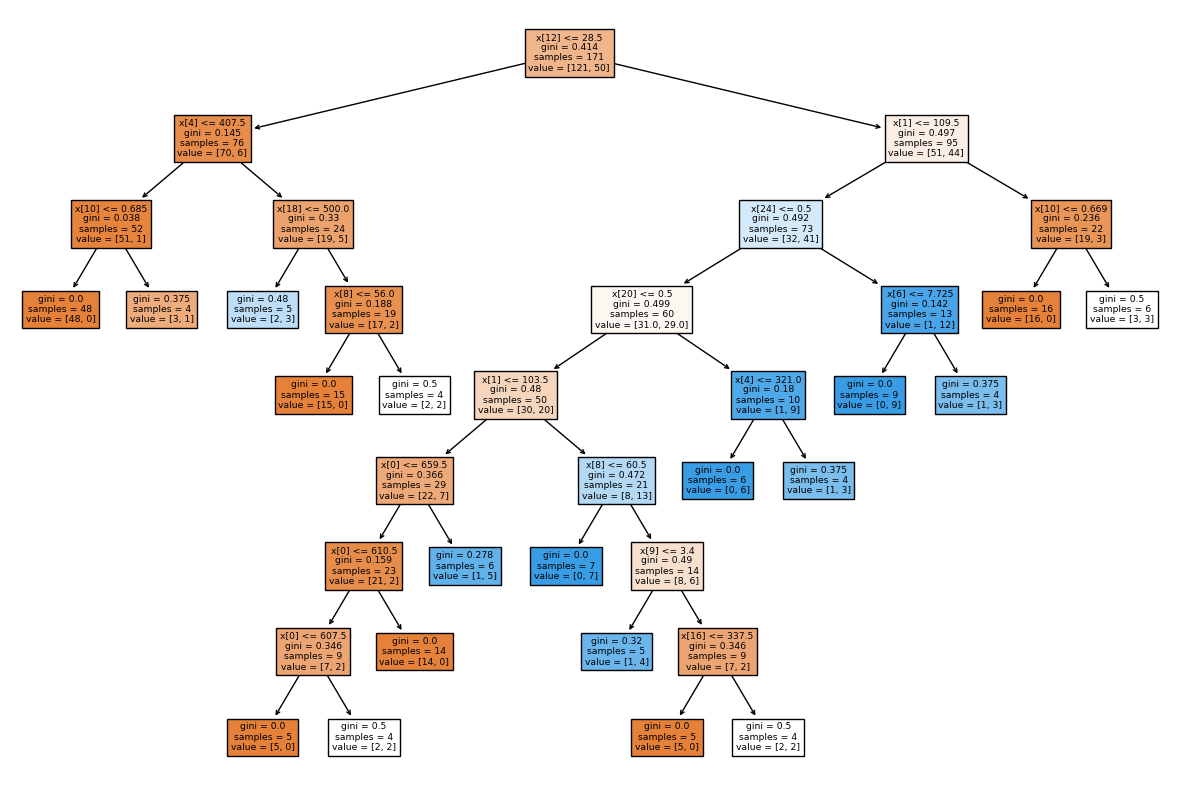

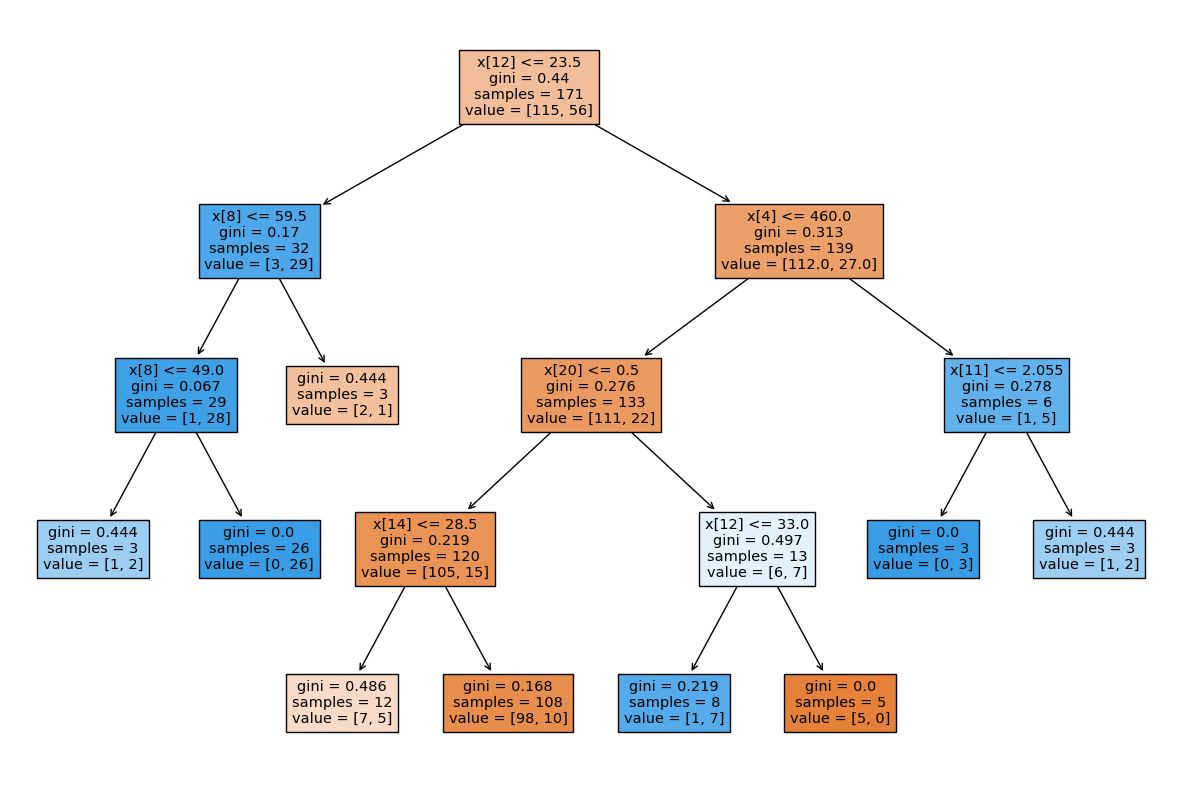

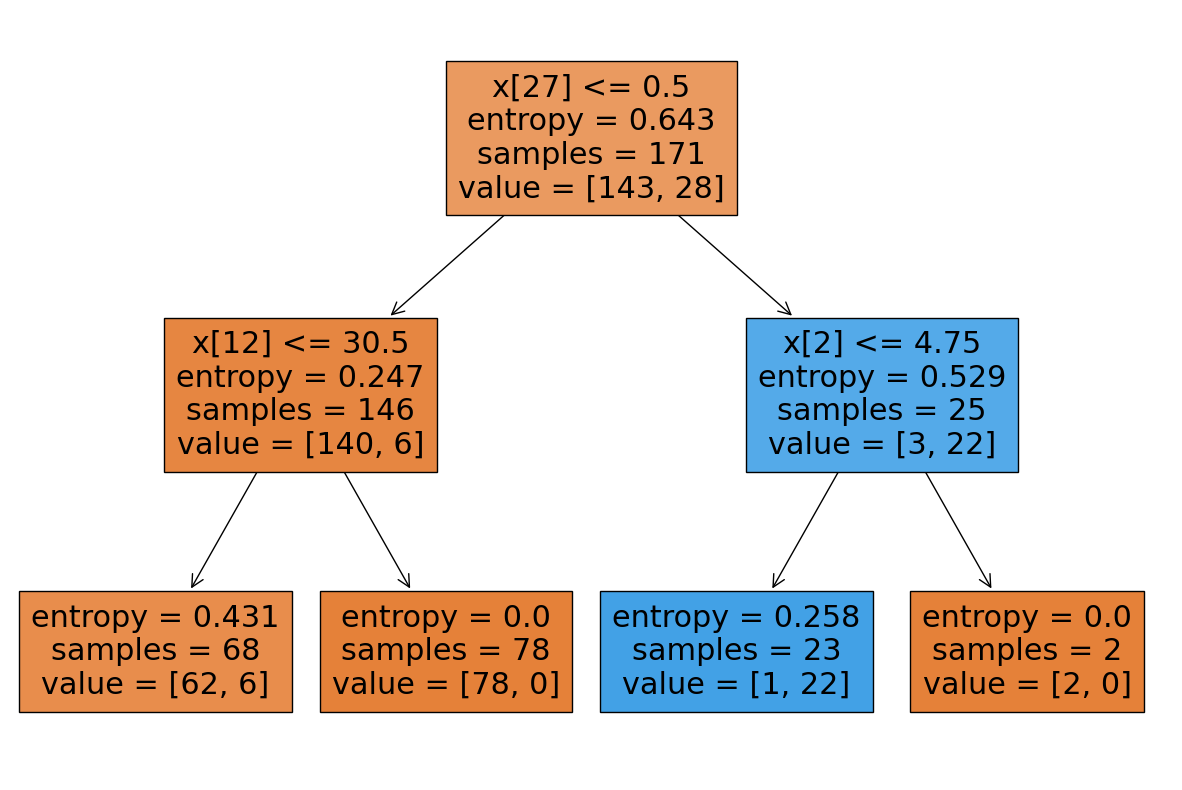

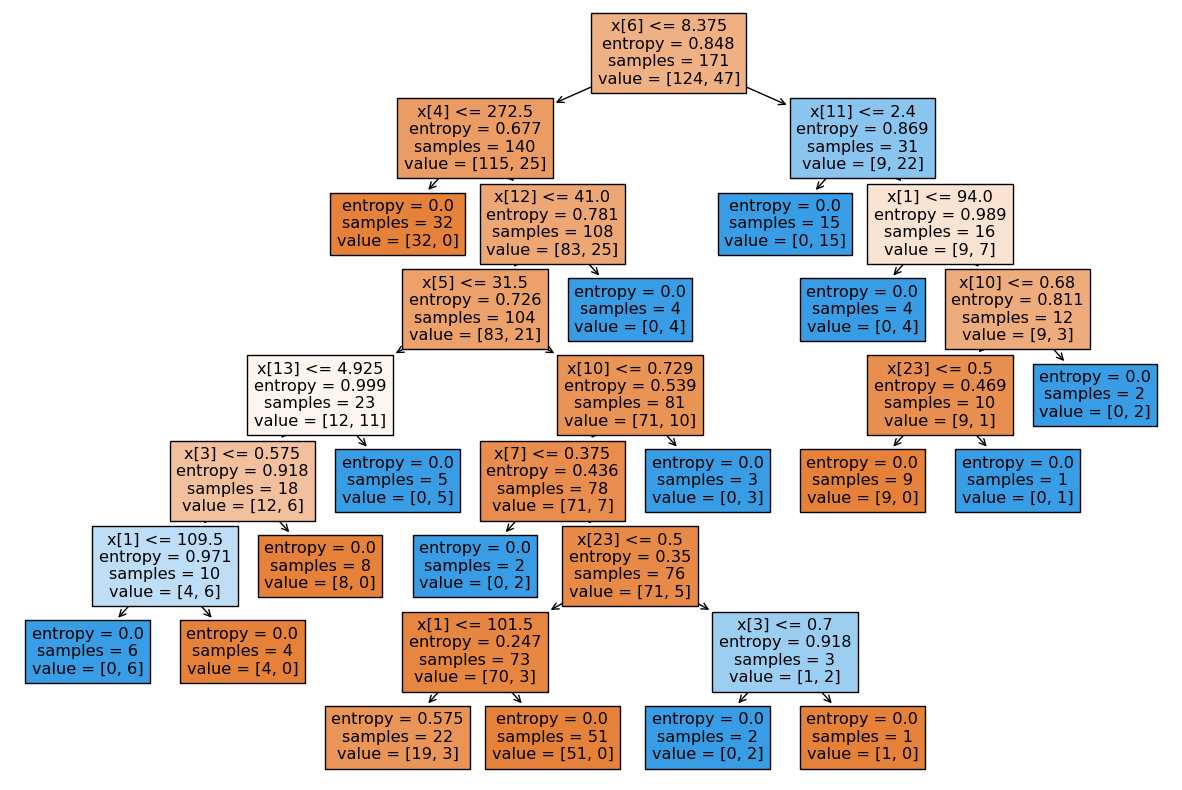

In [12]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

z=0
for targ in y:
    treee=tree.DecisionTreeClassifier(max_depth=depth[z], criterion=criterion[z], min_samples_leaf= leaf[z])
    treee.fit(X, y[targ])
    z+=1
    figure=plt.figure(figsize=(15, 10))  
    plot_tree(treee, filled=True)
    plt.show()
    figure.savefig(fname=f"claasificationtree_{z}.png" ,dpi=100)
    

## Random forests
One of the major drawbacks of decision trees is their tendency to severely overfit on the data given as input. To improve this behavior, multiples trees are often built on randomly drawn subset of individuals and their contribution to the classification voted.

**Questions**:
1. Build a random forest using the class`RandomForestClassifier` https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.
2. Identify the hyperparameters and select the optimum combination using cross validation.
3. Train the random forest on the whole dataset and return the final score.
4. **Bonus**: compare the resilience to over fitting of trees and random forests by performing the following experiments: split the dataset into train and test, compare the results of the trees on train and test with the results of the random forest on the same dataset.

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold

kf = KFold(n_splits=5)
z=0
for targ in y:
    accuracy=[]
    recall=[]
    rf_classifier = RandomForestClassifier(n_estimators=100,criterion=criterion[z], min_samples_leaf=leaf[z], max_depth=depth[z]) 
    for train_index, test_index in kf.split(X.values):
        X_train, X_test = X.values[train_index], X.values[test_index]
        y_train, y_test = y[targ][train_index], y[targ][test_index]        
        # Entraînement du modèle
        rf_classifier.fit(X_train, y_train)    
        # Prédiction sur l'ensemble de test
        y_pred = rf_classifier.predict(X_test) 
        # Calcul de la précision
        accuracy.append(accuracy_score(y_test, y_pred))
        recall.append(recall_score(y_test,y_pred))
    z+=1
    print("======")
    print(f"Average {targ} accuracy scores {np.mean(accuracy)}")
    print(f"Average {targ} recall scores {np.mean(recall)}")



Average isTop accuracy scores 0.7536134453781513
Average isTop recall scores 0.5033775048480931
Average isJgl accuracy scores 0.7310924369747899
Average isJgl recall scores 0.298989898989899
Average isMid accuracy scores 0.8250420168067226
Average isMid recall scores 0.5622222222222222
Average isBot accuracy scores 0.9591596638655462
Average isBot recall scores 0.7933333333333332
Average isSup accuracy scores 0.8072268907563025
Average isSup recall scores 0.4023076923076923


In [19]:
z=0
for targ in y:
    rf_classifier = RandomForestClassifier(n_estimators=100,criterion=criterion[z], min_samples_leaf=leaf[z], max_depth=depth[z]) 
    rf_classifier.fit(X,y[targ])
    y_pred = rf_classifier.predict(X)
    z=+1
    print(accuracy_score(y[targ], y_pred))

0.8304093567251462
0.9239766081871345
0.9181286549707602
0.9590643274853801
0.9064327485380117


In [21]:
from sklearn.model_selection import train_test_split

z=0
for targ in y:
    X_train, X_test, y_train, y_test = train_test_split(X, y[targ], test_size=0.2)
    rf_classifier = RandomForestClassifier(n_estimators=100,criterion=criterion[z], min_samples_leaf=leaf[z], max_depth=depth[z])
    rf_classifier.fit(X_train, y_train)
    y_pred = rf_classifier.predict(X_test)
    print('forest :', accuracy_score(y_test, y_pred))
    treee=tree.DecisionTreeClassifier(criterion=criterion[z], min_samples_leaf=leaf[z], max_depth=depth[z])
    treee.fit(X_train, y_train)
    y_pred = treee.predict(X_test)
    print('tree :', accuracy_score(y_test, y_pred))
    z+=1

forest : 0.6857142857142857
tree : 0.7428571428571429
forest : 0.7714285714285715
tree : 0.8
forest : 0.8285714285714286
tree : 0.8285714285714286
forest : 0.9142857142857143
tree : 0.8285714285714286
forest : 0.7714285714285715
tree : 0.7428571428571429
